In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
list_csv = list(filter(lambda f: f.endswith('.csv'), os.listdir()))

In [3]:
list_csv

['01a_Driver_Profile_Data.csv',
 '02_Driver_Lifetime_Trips.csv',
 '10_Driver_Online_Offline.csv',
 '14_Driver_Dispatches_Offeredand_Accepted.csv',
 '16_Driver_Trip_Status.csv',
 '17_Driver_Cancellations_From_Riders.csv',
 '19a_Driver_Payments.csv']

In [4]:
"""Driver_Profile_Data = pd.read_csv("01a_Driver_Profile_Data.csv")
#Driver_Lifetime_Trips = pd.read_csv("02_Driver_Lifetime_Trips.csv")
Driver_Online_Offline = pd.read_csv("10_Driver_Online_Offline.csv")
#Driver_Dispatches_Offeredand_Accepted = pd.read_csv("14_Driver_Dispatches_Offeredand_Accepted.csv")
Driver_Trip_Status = pd.read_csv("16_Driver_Trip_Status.csv")
Driver_Cancellations_From_Riders = pd.read_csv("17_Driver_Cancellations_From_Riders.csv")
Driver_Payments = pd.read_csv("19a_Driver_Payments.csv")"""

'Driver_Profile_Data = pd.read_csv("01a_Driver_Profile_Data.csv")\n#Driver_Lifetime_Trips = pd.read_csv("02_Driver_Lifetime_Trips.csv")\nDriver_Online_Offline = pd.read_csv("10_Driver_Online_Offline.csv")\n#Driver_Dispatches_Offeredand_Accepted = pd.read_csv("14_Driver_Dispatches_Offeredand_Accepted.csv")\nDriver_Trip_Status = pd.read_csv("16_Driver_Trip_Status.csv")\nDriver_Cancellations_From_Riders = pd.read_csv("17_Driver_Cancellations_From_Riders.csv")\nDriver_Payments = pd.read_csv("19a_Driver_Payments.csv")'

# 01- Driver account profile information


Driver_Profile_Data.csv contiennent les informations de base sur le profil compte conducteur.

In [5]:
Driver_Profile_Data = pd.read_csv("01a_Driver_Profile_Data.csv")

In [6]:
Driver_Profile_Data.head()

,firstname,lastname,email,is_uber_email,mobile_country_code,contact_number,is_partner,is_polymorphed,is_fleet_active,is_subscribed_sms,...,first_eats_completed_trip_timestamp,first_role,partner_fleet_type,preferred_name,primary_role,secondary_role,tertiary_role,is_fleet_driver,signup_country_id,first_rides_completed_trip_timestamp
0,El Mahdi,Kardaoui,elm.kar85@outlook.com,False,33,616627080,False,False,False,True,...,NaN,partner,NaN,El Mahdi,driver,NaN,NaN,True,61,2020-08-22T20:20:27.000Z


In [7]:
Driver_Profile_Data.shape

(1, 46)

# 02 Driver lifetime trip data


02_Driver_Lifetime_Trips.csv : Ce document fournit des informations sur le nombre total de voyages.


In [8]:
Driver_Lifetime_Trips = pd.read_csv("02_Driver_Lifetime_Trips.csv")

In [34]:
driver_lifetime = Driver_Lifetime_Trips.copy()

In [10]:
driver_lifetime.shape

(2310, 88)

In [11]:
driver_lifetime.head()

,uuid,vehicle_uuid,city_id,currency_code,timezone,flow,source_tag,product_type_name,global_product_name,request_timestamp_local,...,long_distance_surcharge_usd,guaranteed_surge_multiplier,ufp_type,cancellation_type,carrier_mcc,carrier_mnc,is_directed_dispatch_trip,wait_duration_minutes,is_scheduled_trip,is_airport_trip
0,350df378-4497-42a0-9910-487ef5acd990,e18fa882-cf34-4c19-9bb0-cf4067022310,3,EUR,Europe/Paris,Black,NaN,uberX,UberX,2022-02-02T19:29:37.000Z,...,NaN,NaN,ufp_honored,NaN,208.0,20.0,False,NaN,False,False
1,3afbb3a4-412a-4f3d-a0f4-f9ba79641b44,e18fa882-cf34-4c19-9bb0-cf4067022310,3,EUR,Europe/Paris,Black,NaN,GREEN,UberX,2022-02-02T18:29:26.000Z,...,NaN,NaN,ufp_honored,NaN,270.0,77.0,False,NaN,False,False
2,1f04d2cb-0222-4f0a-bfaa-36fcde986262,e18fa882-cf34-4c19-9bb0-cf4067022310,3,EUR,Europe/Paris,Black,NaN,uberX,UberX,2022-02-02T14:21:19.000Z,...,NaN,NaN,ufp_not_honored,NaN,208.0,15.0,False,NaN,False,False
3,d3b1230c-7409-4e4e-bc29-5d1f6cc18dc1,e18fa882-cf34-4c19-9bb0-cf4067022310,3,EUR,Europe/Paris,Black,NaN,uberX,UberX,2022-01-31T17:30:04.000Z,...,NaN,NaN,ufp_honored,NaN,208.0,10.0,False,NaN,False,False
4,08ef1035-6141-46bd-9fa5-a51794e69d05,e18fa882-cf34-4c19-9bb0-cf4067022310,3,EUR,Europe/Paris,Black,NaN,GREEN,UberX,2022-01-31T16:30:40.000Z,...,NaN,NaN,ufp_not_honored,NaN,208.0,1.0,False,NaN,False,False


## 02.01 Suppression des colonnes inutils

In [35]:
# Suppression des colones avec une seule valeurs

unique_counts = driver_lifetime.nunique(dropna=True)
unique_counts_nan = driver_lifetime.nunique(dropna=False)
columns_to_drop_unique = unique_counts[unique_counts == 1].index.append(unique_counts_nan[unique_counts_nan == 1].index)


In [36]:
# nombre de colonnes avec une seul valeurs 
len(set(columns_to_drop_unique))

28

In [37]:
columns_to_drop_unique

Index(['city_id', 'currency_code', 'timezone', 'flow', 'source_tag',
       'has_destination', 'is_pool_matched', 'is_flat_rate',
       'is_wait_time_eligible', 'rewindtrip_timestamp_local',
       'rewindtrip_timestamp_utc', 'rounding_down_amount_local',
       'rounding_down_amount_usd', 'concierge_source_type',
       'cancellation_type', 'is_directed_dispatch_trip', 'city_id',
       'currency_code', 'timezone', 'has_destination', 'is_pool_matched',
       'is_flat_rate', 'is_wait_time_eligible', 'service_fee_local',
       'service_fee_usd', 'toll_amount_local', 'toll_amount_usd',
       'booking_fee_local', 'booking_fee_usd', 'earnings_boost_local',
       'earnings_boost_usd', 'is_on_time', 'long_distance_surcharge_local',
       'long_distance_surcharge_usd', 'guaranteed_surge_multiplier',
       'is_directed_dispatch_trip'],
      dtype='object')

In [44]:
Driver_Lifetime_Trips[columns_to_drop_unique.drop_duplicates()].isna().sum()

city_id                             0
currency_code                       0
timezone                            0
flow                                2
source_tag                       2308
has_destination                     0
is_pool_matched                     0
is_flat_rate                        0
is_wait_time_eligible               0
rewindtrip_timestamp_local       2309
rewindtrip_timestamp_utc         2309
rounding_down_amount_local        199
rounding_down_amount_usd          199
concierge_source_type            2309
cancellation_type                2266
is_directed_dispatch_trip           0
service_fee_local                2310
service_fee_usd                  2310
toll_amount_local                2310
toll_amount_usd                  2310
booking_fee_local                2310
booking_fee_usd                  2310
earnings_boost_local             2310
earnings_boost_usd               2310
is_on_time                       2310
long_distance_surcharge_local    2310
long_distanc

In [39]:
driver_lifetime.drop(columns=columns_to_drop_unique, inplace=True)

In [40]:
driver_lifetime.shape

(2310, 60)

In [45]:
# Suppression des colonnes en double (unités de mesures)

chaîne = '_utc|_usd'
columns_to_drop_doublon = driver_lifetime.filter(regex=chaîne).columns

In [46]:
len(columns_to_drop_doublon)

14

In [47]:
columns_to_drop_doublon

Index(['request_timestamp_utc', 'begintrip_timestamp_utc',
       'dropoff_timestamp_utc', 'promotion_usd', 'credits_usd',
       'driver_upfront_fare_usd', 'original_fare_usd', 'base_fare_usd',
       'surge_fare_usd', 'minimum_fare_roundup_usd', 'per_mile_fare_usd',
       'per_minute_fare_usd', 'cancellation_fee_usd', 'wait_time_fare_usd'],
      dtype='object')

In [48]:
driver_lifetime.drop(columns=columns_to_drop_doublon, inplace=True)

In [49]:
driver_lifetime.shape

(2310, 46)

In [55]:
driver_lifetime.isna().sum()

uuid                                    0
vehicle_uuid                            0
product_type_name                       0
global_product_name                     0
request_timestamp_local                 0
begintrip_timestamp_local             198
dropoff_timestamp_local               201
eta                                    13
surge_multiplier                        0
is_surged                               0
is_star_power                           0
request_to_begin_distance_miles        13
request_to_begin_duration_seconds     198
trip_distance_miles                     0
trip_duration_seconds                   0
status                                  0
is_completed                            0
is_cash_trip                            0
is_rewindtrip                           0
promotion_local                      2273
credits_local                        2303
has_driver_upfront_fare                 0
driver_upfront_fare_local             336
original_fare_local               

## 02.02 Valeurs Null

In [57]:
# colonnes avec des valeurs null
col_with_nan = driver_lifetime.columns[driver_lifetime.isna().sum() != 0]

In [59]:
driver_lifetime[col_with_nan]

,begintrip_timestamp_local,dropoff_timestamp_local,eta,request_to_begin_distance_miles,request_to_begin_duration_seconds,promotion_local,credits_local,driver_upfront_fare_local,base_fare_local,surge_fare_local,...,fare_duration_minutes,driver_trip_number,wait_time_fare_local,commission_rate,driver_cancellation_reason,vehicle_trip_number,ufp_type,carrier_mcc,carrier_mnc,wait_duration_minutes
0,2022-02-02T19:31:44.000Z,2022-02-02T19:53:15.000Z,102.0,0.009572,127.0,NaN,NaN,17.72,0.0,0.00,...,21.516667,2096.0,NaN,0.25,NaN,857.0,ufp_honored,208.0,20.0,NaN
1,2022-02-02T18:35:24.000Z,2022-02-02T19:05:16.000Z,179.0,0.011941,358.0,NaN,NaN,20.28,0.0,0.00,...,29.866667,2095.0,NaN,0.25,NaN,856.0,ufp_honored,270.0,77.0,NaN
2,2022-02-02T14:24:09.000Z,2022-02-02T14:38:59.000Z,183.0,0.003741,170.0,NaN,NaN,NaN,0.0,0.00,...,14.833333,2094.0,NaN,0.25,NaN,855.0,ufp_not_honored,208.0,15.0,NaN
3,2022-01-31T17:36:28.000Z,2022-01-31T18:05:34.000Z,258.0,0.002467,384.0,NaN,NaN,18.53,0.0,0.00,...,29.100000,2093.0,NaN,0.25,NaN,854.0,ufp_honored,208.0,10.0,NaN
4,2022-01-31T16:43:28.000Z,2022-01-31T17:26:52.000Z,358.0,0.441247,768.0,NaN,NaN,NaN,0.0,3.34,...,43.400000,2092.0,NaN,0.25,NaN,853.0,ufp_not_honored,208.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,2020-08-23T00:43:15.000Z,2020-08-23T01:08:10.000Z,245.0,0.018949,183.0,NaN,NaN,17.10,1.2,0.00,...,24.916667,5.0,NaN,0.25,NaN,676.0,ufp_honored,NaN,NaN,NaN
2306,2020-08-23T00:20:22.000Z,2020-08-23T00:30:39.000Z,149.0,0.004029,192.0,NaN,NaN,6.22,1.2,0.00,...,10.283333,4.0,NaN,0.25,NaN,675.0,ufp_honored,NaN,NaN,NaN
2307,2020-08-23T00:10:54.000Z,2020-08-23T00:17:19.000Z,13.0,0.012332,304.0,NaN,NaN,6.00,1.2,0.00,...,6.416667,3.0,NaN,0.25,NaN,674.0,ufp_honored,NaN,NaN,NaN
2308,2020-08-22T23:21:58.000Z,2020-08-22T23:46:06.000Z,90.0,0.003192,264.0,NaN,NaN,14.41,1.2,0.00,...,24.133333,2.0,NaN,0.25,NaN,673.0,ufp_honored,NaN,NaN,NaN


In [63]:
driver_lifetime.isna().sum().sort_values(ascending=False)

minimum_fare_roundup_local           2304
credits_local                        2303
promotion_local                      2273
driver_cancellation_reason           2268
wait_duration_minutes                2186
wait_time_fare_local                 2186
driver_upfront_fare_local             336
vehicle_trip_number                   201
dropoff_timestamp_local               201
driver_trip_number                    201
surge_fare_local                      200
per_mile_fare_local                   199
base_fare_local                       199
fare_duration_minutes                 199
per_minute_fare_local                 199
fare_distance_miles                   199
request_to_begin_duration_seconds     198
begintrip_timestamp_local             198
carrier_mcc                           164
carrier_mnc                           164
commission_rate                        13
request_to_begin_distance_miles        13
eta                                    13
ufp_type                          

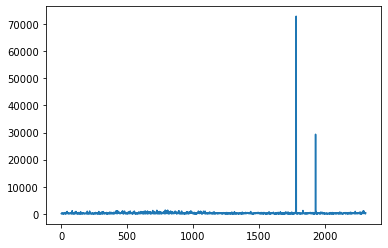

In [77]:
driver_lifetime.eta.plot()